In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import os 
from tqdm import tqdm
import pandas as pd
from statistics import mode 
from helper_functions import energy_name

In [2]:
save_plot = True # False

# currentNotebook = ipyparams.notebook_name[:len(ipyparams.notebook_name)-6] # get name of currect notebook
# assert currentNotebook != '', "no notebook name, run cell again"

currentNotebook = "e_cut_v_cut_check"

plot_dir = 'plots/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(plot_dir))

df_dir = 'data/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(df_dir))

0

# Use GEANT4 deflections

In [3]:
df_500_005 = pd.read_hdf('data/e_cut_v_cut_check/total_defl_default.hdf5')
df_1e10_1 = pd.read_hdf('data/e_cut_v_cut_check/total_defl_default_1e10_1.hdf5')
df_100_0001 = pd.read_hdf('data/e_cut_v_cut_check/total_defl_default_100_0001.hdf5')
df_moliere_500_005 = pd.read_hdf('data/e_cut_v_cut_check/total_defl_moliere.hdf5')
df_moliere_1e10_1 = pd.read_hdf('data/e_cut_v_cut_check/total_defl_moliere_1e10_1.hdf5')
df_moliere_100_0001 = pd.read_hdf('data/e_cut_v_cut_check/total_defl_moliere_100_0001.hdf5')

In [4]:
E_i = df_500_005.E_i[0] * 1e3 # energy in MeV
E_f = mode(df_500_005.E_f) * 1e3 # energy in MeV
n_events = len(df_500_005)

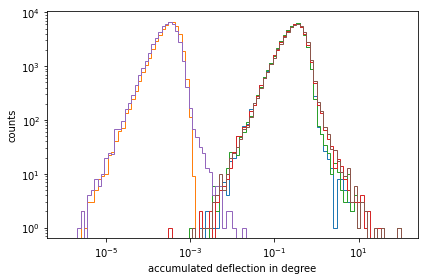

In [5]:
bins = np.logspace(-6, 2, 101)
plt.hist(df_500_005.deflection, bins=bins, histtype='step', label='e_cut=500, v_cut=0.05, highlandintegral')
plt.hist(df_1e10_1.deflection, bins=bins, histtype='step', label='e_cut=1e10, v_cut=1, highlandintegral')
plt.hist(df_100_0001.deflection, bins=bins, histtype='step', label='e_cut=100, v_cut=0.001, highlandintegral')
plt.hist(df_moliere_500_005.deflection, bins=bins, histtype='step', label='e_cut=500, v_cut=0.05, moliere')
plt.hist(df_moliere_1e10_1.deflection, bins=bins, histtype='step', label='e_cut=1e10, v_cut=1, moliere')
plt.hist(df_moliere_100_0001.deflection, bins=bins, histtype='step', label='e_cut=100, v_cut=0.001, moliere')
plt.xlabel('accumulated deflection in degree')
plt.ylabel('counts')
plt.xscale('log')
plt.yscale('log')
# plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '{}_{}_{}events_deflection.pdf'.format(energy_name(E_i), energy_name(E_f), n_events))

In [6]:
def d_shower(x, y): 
    return np.sqrt(x**2 + y**2) / 100 # distance in meter

In [7]:
d_shower_500_005 = d_shower(df_500_005.x_f, df_500_005.y_f)
d_shower_1e10_1 = d_shower(df_1e10_1.x_f, df_1e10_1.y_f)
d_shower_100_0001 = d_shower(df_100_0001.x_f, df_100_0001.y_f)
d_shower_moliere_500_005 = d_shower(df_moliere_500_005.x_f, df_moliere_500_005.y_f)
d_shower_moliere_1e10_1 = d_shower(df_moliere_1e10_1.x_f, df_moliere_1e10_1.y_f)
d_shower_moliere_100_0001 = d_shower(df_moliere_100_0001.x_f, df_moliere_100_0001.y_f)

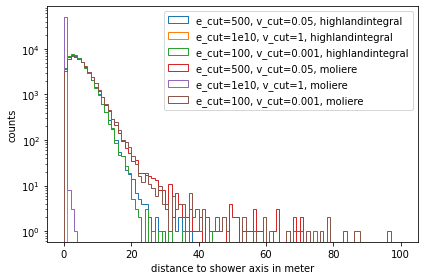

In [8]:
bins = np.linspace(0, 100, 101)
plt.hist(d_shower_500_005, bins=bins, histtype='step', label='e_cut=500, v_cut=0.05, highlandintegral')
plt.hist(d_shower_1e10_1, bins=bins, histtype='step', label='e_cut=1e10, v_cut=1, highlandintegral')
plt.hist(d_shower_100_0001, bins=bins, histtype='step', label='e_cut=100, v_cut=0.001, highlandintegral')
plt.hist(d_shower_moliere_500_005, bins=bins, histtype='step', label='e_cut=500, v_cut=0.05, moliere')
plt.hist(d_shower_moliere_1e10_1, bins=bins, histtype='step', label='e_cut=1e10, v_cut=1, moliere')
plt.hist(d_shower_moliere_100_0001, bins=bins, histtype='step', label='e_cut=100, v_cut=0.001, moliere')
plt.xlabel('distance to shower axis in meter')
plt.ylabel('counts')
# plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '{}_{}_{}events_distance_showeraxis.pdf'.format(energy_name(E_i), energy_name(E_f), n_events))    

# Use Van Ginneken deflections

In [17]:
df_highland_500_05_vG = pd.read_hdf('data/e_cut_v_cut_check/total_defl_vG_highland_500_05.hdf5')
df_highland_1e10_05_vG = pd.read_hdf('data/e_cut_v_cut_check/total_defl_vG_highland_1e10_05.hdf5')
df_moliere_500_05_vG = pd.read_hdf('data/e_cut_v_cut_check/total_defl_vG_moliere_500_05.hdf5')
df_moliere_1e10_05_vG = pd.read_hdf('data/e_cut_v_cut_check/total_defl_vG_moliere_1e10_05.hdf5')

In [18]:
E_i = df_highland_500_05_vG.E_i[0] * 1e3 # energy in MeV
E_f = mode(df_highland_500_05_vG.E_f) * 1e3 # energy in MeV
n_events = len(df_highland_500_05_vG)

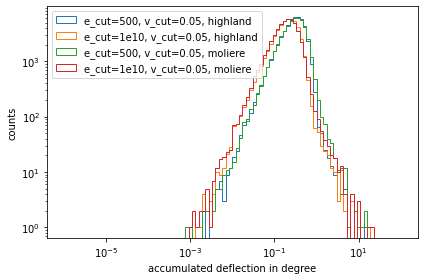

In [25]:
bins = np.logspace(-6, 2, 101)
plt.hist(df_highland_500_05_vG.deflection, bins=bins, histtype='step', label='e_cut=500, v_cut=0.05, highland')
plt.hist(df_highland_1e10_05_vG.deflection, bins=bins, histtype='step', label='e_cut=1e10, v_cut=0.05, highland')
plt.hist(df_moliere_500_05_vG.deflection, bins=bins, histtype='step', label='e_cut=500, v_cut=0.05, moliere')
plt.hist(df_moliere_1e10_05_vG.deflection, bins=bins, histtype='step', label='e_cut=1e10, v_cut=0.05, moliere')

plt.xlabel('accumulated deflection in degree')
plt.ylabel('counts')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '{}_{}_{}events_deflection_vG.pdf'.format(energy_name(E_i), energy_name(E_f), n_events))

In [22]:
d_shower_highland_500_05_vG = d_shower(df_highland_500_05_vG.x_f, df_highland_500_05_vG.y_f)
d_shower_highland_1e10_05_vG = d_shower(df_highland_1e10_05_vG.x_f, df_highland_1e10_05_vG.y_f)
d_shower_moliere_500_05_vG = d_shower(df_moliere_500_05_vG.x_f, df_moliere_500_05_vG.y_f)
d_shower_moliere_1e10_05_vG = d_shower(df_moliere_1e10_05_vG.x_f, df_moliere_1e10_05_vG.y_f)

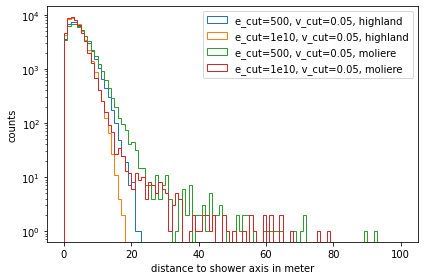

In [23]:
bins = np.linspace(0, 100, 101)
plt.hist(d_shower_highland_500_05_vG, bins=bins, histtype='step', label='e_cut=500, v_cut=0.05, highland')
plt.hist(d_shower_highland_1e10_05_vG, bins=bins, histtype='step', label='e_cut=1e10, v_cut=0.05, highland')
plt.hist(d_shower_moliere_500_05_vG, bins=bins, histtype='step', label='e_cut=500, v_cut=0.05, moliere')
plt.hist(d_shower_moliere_1e10_05_vG, bins=bins, histtype='step', label='e_cut=1e10, v_cut=0.05, moliere')

plt.xlabel('distance to shower axis in meter')
plt.ylabel('counts')
# plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '{}_{}_{}events_distance_showeraxis_vG.pdf'.format(energy_name(E_i), energy_name(E_f), n_events))    